In [1]:
import numpy as np
from numpy import fft
import matplotlib.pylab as plt

from blusky.wavelets.morlet2d import Morlet2D

In [2]:
def do_vis(wavelet, sample_rate=0.004):
    """
    Visualize the wavelet an it's spectrum.
    
    Parameters
    ----------
    wav - Array
        The wavelet.
    """    
    f1 = fft.fftshift(np.fft.fftn(wavelet))
    f2 = fft.fftshift(np.fft.fft(wavelet[wavelet.shape[0]//2,:]))
       
    freqz = fft.fftshift(np.fft.fftfreq(wavelet.shape[0], sample_rate))    
    
    fig, axs = plt.subplots(2,2,figsize=(20,10))   
    axs[0,0].imshow(wavelet.real)
    axs[0,0].set_title('Real Part')
    
    axs[0,1].imshow(wavelet.imag)
    axs[0,1].set_title('Imag Part')
    
    axs[1,0].imshow(np.abs(f1.T), extent=(freqz.min(), freqz.max(), freqz.min(), freqz.max()))
    axs[1,0].set_title('Fourier (Power)')
    
    axs[1,1].plot(freqz, np.abs(f2))
    axs[1,1].set_title('Fourier Cross-Section (Power)')
    
    plt.show()


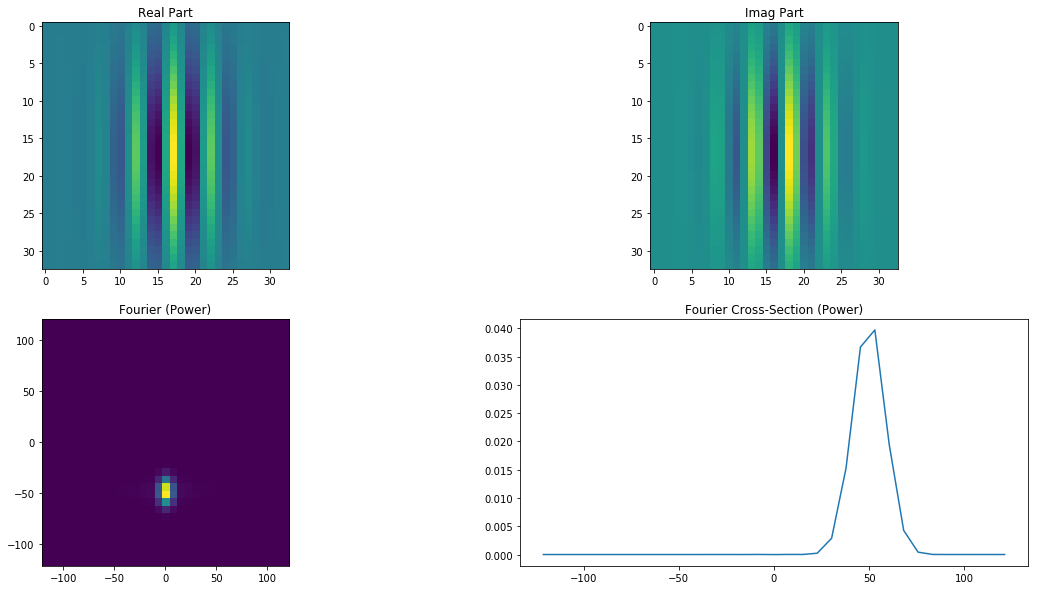

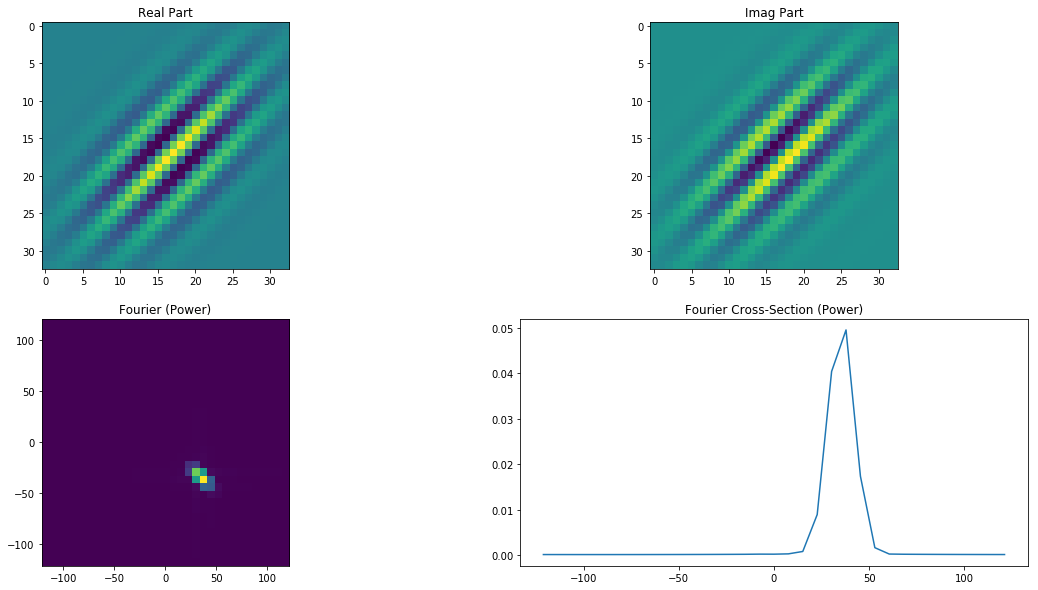

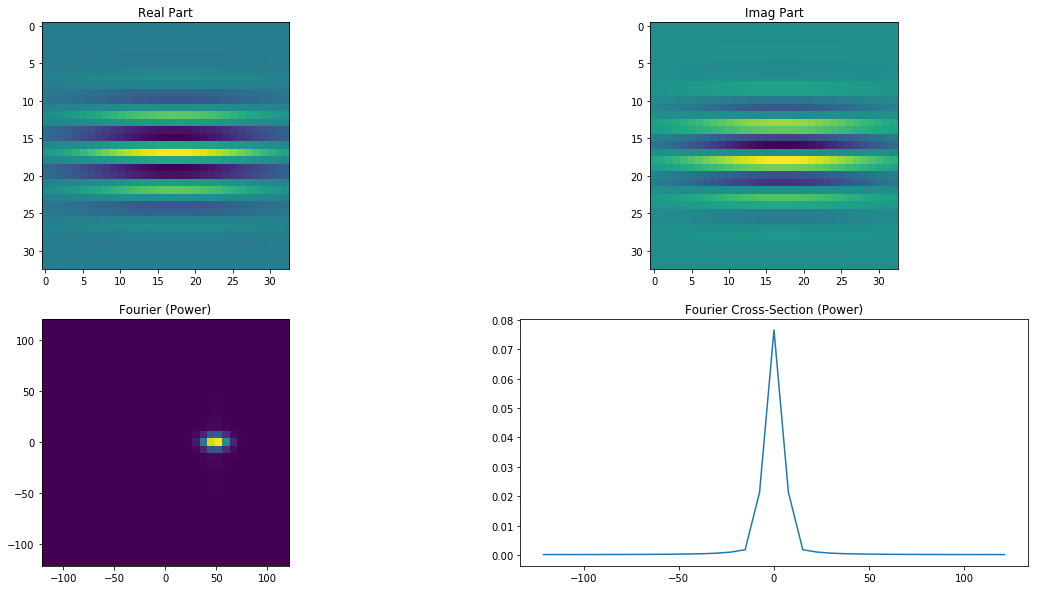

In [5]:
"""
Construct a 2d morlet of a certain character.

We generate different orientations, crop for convolutions and show the taper
features. 
"""
wav = Morlet2D(sample_rate=0.004, 
               center_frequency=50., 
               bandwidth=(20.,10.), 
               crop=3.5, 
               taper=False)
wavlets = [wav.kernel(0.0), wav.kernel(45.0), wav.kernel(90.0)]
list(map(do_vis, wavlets));


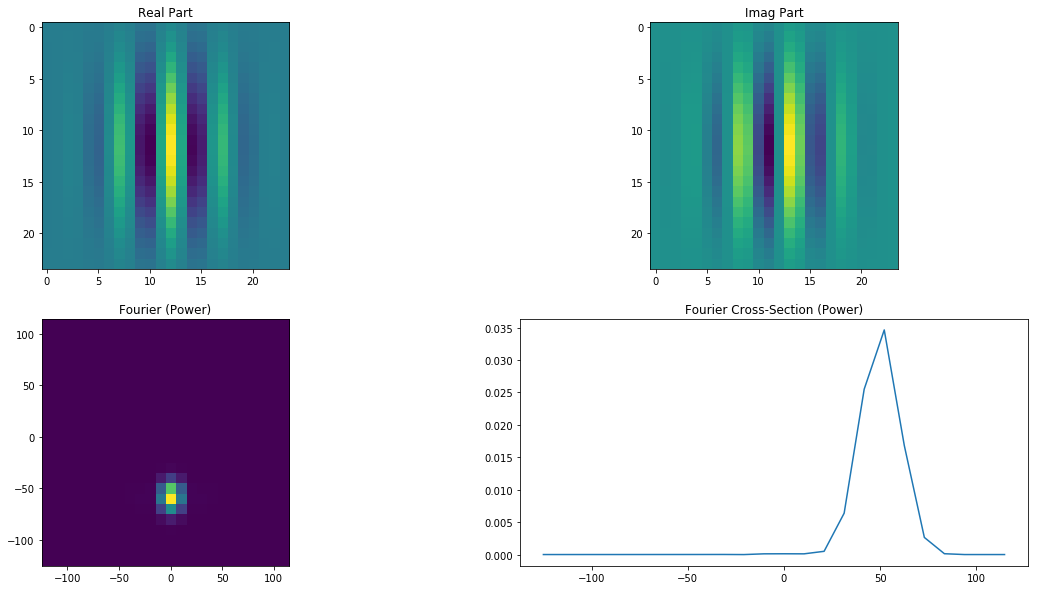

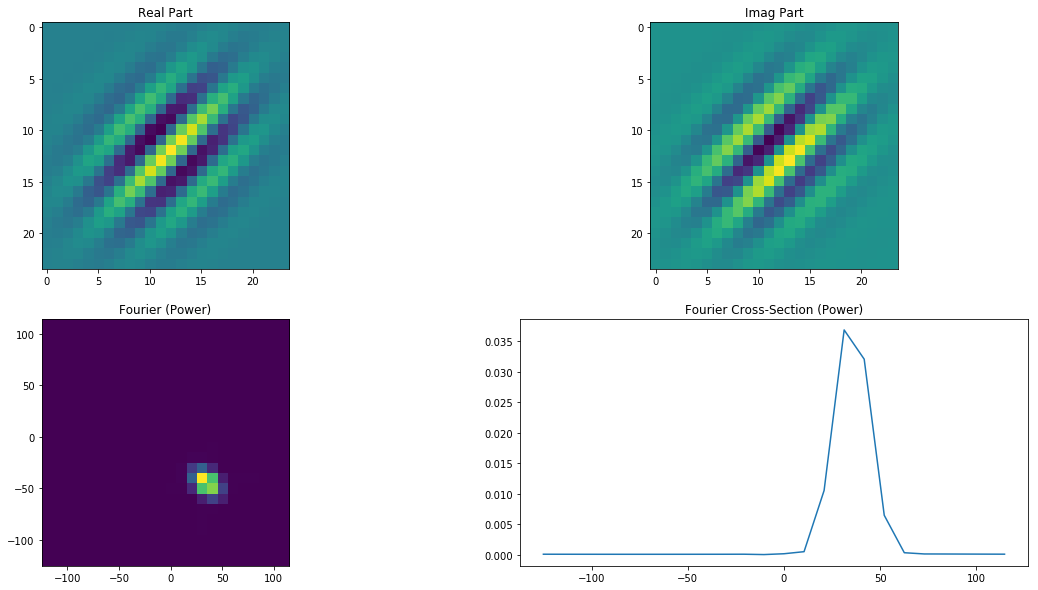

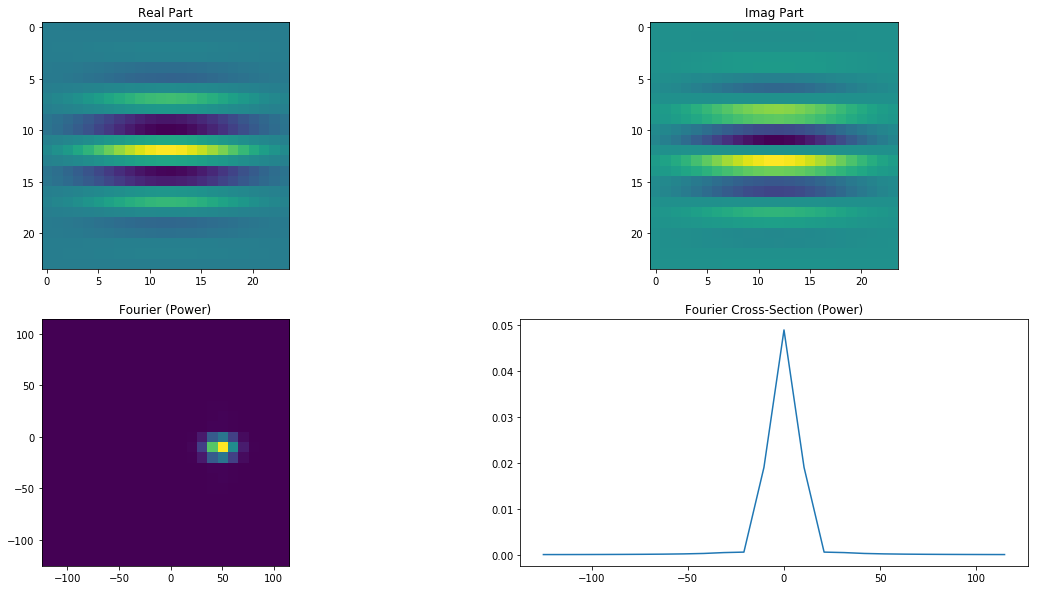

In [7]:
wav = Morlet2D(sample_rate=0.004, 
               center_frequency=50., 
               bandwidth=(20.,10.), 
               crop=2.5, 
               taper=True)
wavlets = [wav.kernel(0.0), wav.kernel(45.0), wav.kernel(90.0)]
list(map(do_vis, wavlets));


    
